In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import requests
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

## get crashes_df from the API and clean

In [34]:
endpoint_crashes = 'https://data.cityofchicago.org/resource/85ca-t3if.geojson?$select=crash_record_id,crash_date,posted_speed_limit,traffic_control_device,device_condition,first_crash_type,trafficway_type,lane_cnt,road_defect,prim_contributory_cause,sec_contributory_cause,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,injuries_unknown,crash_hour,crash_day_of_week,crash_month,latitude,longitude,location&$limit=650000'
res = requests.get(endpoint_crashes)
res = res.json()
res

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'geometry': {'type': 'Point',
    'coordinates': [-87.743379906115, 41.807493414229]},
   'properties': {'injuries_fatal': '0',
    'injuries_non_incapacitating': '0',
    'crash_record_id': '593ce1c002b749dcb18ece3390527b4b862dcc8db1856f46d54151fd8441f41262b2401c0b6b33d2bac143429af1b9f7e02c8673385ef7d8f8b124f83df5994a',
    'injuries_incapacitating': '0',
    'injuries_no_indication': '2',
    'latitude': '41.807493414',
    'injuries_unknown': '0',
    'device_condition': 'NO CONTROLS',
    'crash_date': '2022-08-04T09:10:00.000',
    'trafficway_type': 'NOT DIVIDED',
    'traffic_control_device': 'NO CONTROLS',
    'road_defect': 'NO DEFECTS',
    'longitude': '-87.743379906',
    'crash_month': '8',
    'crash_day_of_week': '5',
    'crash_hour': '9',
    'first_crash_type': 'REAR END',
    'injuries_reported_not_evident': '0',
    'most_severe_injury': 'NO INDICATION OF INJURY',
    'prim_contributory_cause': 'FOLL

In [36]:
# this is the line that works when you don't do any select= in the endpoint
crashes_df = gpd.GeoDataFrame.from_features(res['features'])
#crashes_df = pd.DataFrame(res)
#gpd.GeoDataFrame(res)
#crashes_df.columns

In [37]:
crashes_df.head()

geometry injuries_fatal injuries_non_incapacitating  \
0  POINT (-87.74338 41.80749)              0                           0   
1  POINT (-87.64959 41.93625)              0                           0   
2  POINT (-87.72255 41.95313)              0                           0   
3  POINT (-87.64942 41.94003)              0                           0   
4  POINT (-87.77630 41.94566)              0                           0   

                                     crash_record_id injuries_incapacitating  \
0  593ce1c002b749dcb18ece3390527b4b862dcc8db1856f...                       0   
1  eaafdda3cf0ead6ff1d15dd60a2842b0c68b427b136345...                       0   
2  2ff27a341040d94ffdad5617e393eabb7e73bf3fe002d3...                       0   
3  3df614731dd52c246507ea4d51cca21bd351257366b0ba...                       0   
4  409dbb4ceee8e7967dbe8687ecea232e8d2087a9a6be01...                       0   

  injuries_no_indication      latitude injuries_unknown      device_condition  \
0                      2  41.807493414                0           NO CONTROLS   
1                      2  41.936251149                0           NO CONTROLS   
2                      1  41.953127486                0           NO CONTROLS   
3                      2  41.940032781                0  FUNCTIONING PROPERLY   
4                      3  41.945664231                0  FUNCTIONING PROPERLY   

                crash_date  ... crash_day_of_week crash_hour  \
0  2022-08-04T09:10:00.000  ...                 5          9   
1  2022-08-04T09:10:00.000  ...                 5          9   
2  2022-08-04T08:45:00.000  ...                 5          8   
3  2022-08-04T08:40:00.000  ...                 5          8   
4  2022-08-04T08:30:00.000  ...                 5          8   

               first_crash_type injuries_reported_not_evident  \
0                      REAR END                             0   
1                         ANGLE                             0   
2          PARKED MOTOR VEHICLE                             0   
3      SIDESWIPE SAME DIRECTION                             0   
4  SIDESWIPE OPPOSITE DIRECTION                             0   

        most_severe_injury        prim_contributory_cause  \
0  NO INDICATION OF INJURY          FOLLOWING TOO CLOSELY   
1  NO INDICATION OF INJURY  FAILING TO YIELD RIGHT-OF-WAY   
2  NO INDICATION OF INJURY            UNABLE TO DETERMINE   
3  NO INDICATION OF INJURY            UNABLE TO DETERMINE   
4  NO INDICATION OF INJURY    IMPROPER OVERTAKING/PASSING   

  sec_contributory_cause posted_speed_limit injuries_total lane_cnt  
0    UNABLE TO DETERMINE                 30              0     None  
1         NOT APPLICABLE                 30              0     None  
2    UNABLE TO DETERMINE                 30              0     None  
3    UNABLE TO DETERMINE                 30              0     None  
4    UNABLE TO DETERMINE                 30              0     None  

[5 rows x 25 columns]

In [38]:
type(crashes_df)

geopandas.geodataframe.GeoDataFrame

In [39]:
crashes_df.set_crs(crs='EPSG:4326', inplace=True)

geometry injuries_fatal injuries_non_incapacitating  \
0       POINT (-87.74338 41.80749)              0                           0   
1       POINT (-87.64959 41.93625)              0                           0   
2       POINT (-87.72255 41.95313)              0                           0   
3       POINT (-87.64942 41.94003)              0                           0   
4       POINT (-87.77630 41.94566)              0                           0   
...                            ...            ...                         ...   
637930  POINT (-87.72447 41.83589)              0                           0   
637931  POINT (-87.70114 41.88402)              0                           0   
637932  POINT (-87.56195 41.76071)              0                           1   
637933  POINT (-87.63876 41.88561)              0                           0   
637934  POINT (-87.70874 41.97586)              0                           0   

                                          crash_record_id  \
0       593ce1c002b749dcb18ece3390527b4b862dcc8db1856f...   
1       eaafdda3cf0ead6ff1d15dd60a2842b0c68b427b136345...   
2       2ff27a341040d94ffdad5617e393eabb7e73bf3fe002d3...   
3       3df614731dd52c246507ea4d51cca21bd351257366b0ba...   
4       409dbb4ceee8e7967dbe8687ecea232e8d2087a9a6be01...   
...                                                   ...   
637930  964aaaeb569e364886cfbdf89ca73e09ca15cd916d87b2...   
637931  1d0232afecbdfd01968555aa956a688fd6f55a2bd1984f...   
637932  957783a4787318f005a7dbc920e4c84cb9ac8aa7329a62...   
637933  f62e27317feb174811cf4fefeb9fa1064fea6c0619a873...   
637934  a802658be15312809c771559e4f81088cfb226830792a5...   

       injuries_incapacitating injuries_no_indication      latitude  \
0                            0                      2  41.807493414   
1                            0                      2  41.936251149   
2                            0                      1  41.953127486   
3                            0                      2  41.940032781   
4                            0                      3  41.945664231   
...                        ...                    ...           ...   
637930                       0                      2  41.835886103   
637931                       0                      2  41.884016475   
637932                       0                      1  41.760710194   
637933                       0                      2  41.885609917   
637934                       0                      1  41.975856916   

       injuries_unknown      device_condition               crash_date  ...  \
0                     0           NO CONTROLS  2022-08-04T09:10:00.000  ...   
1                     0           NO CONTROLS  2022-08-04T09:10:00.000  ...   
2                     0           NO CONTROLS  2022-08-04T08:45:00.000  ...   
3                     0  FUNCTIONING PROPERLY  2022-08-04T08:40:00.000  ...   
4                     0  FUNCTIONING PROPERLY  2022-08-04T08:30:00.000  ...   
...                 ...                   ...                      ...  ...   
637930                0           NO CONTROLS  2014-06-25T19:00:00.000  ...   
637931                0  FUNCTIONING PROPERLY  2014-02-24T19:45:00.000  ...   
637932                0           NO CONTROLS  2014-01-21T07:40:00.000  ...   
637933                0           NO CONTROLS  2014-01-18T18:14:00.000  ...   
637934                0  FUNCTIONING PROPERLY  2013-03-03T16:48:00.000  ...   

       crash_day_of_week crash_hour              first_crash_type  \
0                      5          9                      REAR END   
1                      5          9                         ANGLE   
2                      5          8          PARKED MOTOR VEHICLE   
3                      5          8      SIDESWIPE SAME DIRECTION   
4                      5          8  SIDESWIPE OPPOSITE DIRECTION   
...                  ...        ...                           ...   
637930                 4         19

In [40]:
print(crashes_df.crs)

EPSG:4326


In [41]:
#filter out crashes where there was debris on roadway
crashes_df = crashes_df.loc[crashes_df['road_defect'] != 'DEBRIS ON ROADWAY'] 

In [42]:
#filter out crashes where the traffic control device was functioning improperly or not functioning
device_not_working = ['FUNCTIONING IMPROPERLY','NOT FUNCTIONING']
crashes_df = crashes_df.loc[~crashes_df['device_condition'].isin(device_not_working)]
#crashes.loc[crashes['crash_record_id'].isin(crash_id_peds)]

In [43]:
#there is one row in there with POINT of (0,0) and it throws off plotting the map later on, so get rid of it
crashes_df = crashes_df[crashes_df['geometry'].x != 0]

In [44]:
#filter out null geometries
crashes_df = crashes_df[crashes_df['geometry'].notna()]

In [45]:
crashes_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 628330 entries, 0 to 637934
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype   
---  ------                         --------------   -----   
 0   geometry                       628330 non-null  geometry
 1   injuries_fatal                 627009 non-null  object  
 2   injuries_non_incapacitating    627009 non-null  object  
 3   crash_record_id                628330 non-null  object  
 4   injuries_incapacitating        627009 non-null  object  
 5   injuries_no_indication         627009 non-null  object  
 6   latitude                       628330 non-null  object  
 7   injuries_unknown               627009 non-null  object  
 8   device_condition               628330 non-null  object  
 9   crash_date                     628330 non-null  object  
 10  trafficway_type                628330 non-null  object  
 11  traffic_control_device         628330 non-null  object  
 12  road_def

In [46]:
#cleaning lane count - jk, turns out when you call from the API, there's no 2 & 2.0, 4 & 4.0 problem
crashes_df['lane_cnt'].value_counts()

2          89890
4          48740
1          32241
3           8421
0           7932
6           4384
5           1889
8           1877
7            179
10           152
99           108
9             62
12            22
11            21
20            13
15             6
22             6
30             5
40             4
60             3
14             3
16             3
25             2
21             2
100            2
44             1
80             1
24             1
1191625        1
299679         1
218474         1
902            1
45             1
433634         1
400            1
28             1
17             1
41             1
19             1
35             1
Name: lane_cnt, dtype: int64

In [14]:
#cleaning crash_date
test_time = crashes_df.loc[15,'crash_date']
type(test_time)
#it's a string so convert to datetime

str

In [15]:
#try it on one single value
timestamp=pd.to_datetime(test_time, format = '%Y/%m/%d %H:%M:%S')

In [16]:
#gives us a Timestamp
type(timestamp)
timestamp

Timestamp('2022-08-04 06:45:00')

In [17]:
#can use Timestamp methods on it
#Timestamp is pandas equivalent of Python datetime 
#https://pandas.pydata.org/docs/reference/api/pandas.Timestamp.html
timestamp.month_name()

'August'

## making this a Timestamp screwed up my folium map. folium map wants a string
### having as Timestamp throws TypeError: Object of type Timestamp is not JSON serializable
#convert crash_date of whole df
#crashes_df['crash_date'] = pd.to_datetime(crashes_df['crash_date'], format = '%Y/%m/%d %H:%M:%S')

In [19]:
#crash day of week, crash hour and crash month look fine as far as their range
crashes_df['crash_day_of_week'].value_counts()

6    102164
7     93515
5     89807
3     89382
4     88980
2     86927
1     77555
Name: crash_day_of_week, dtype: int64

In [20]:
#injury columns to integers
#leave posted_speed_limit, lane_cnt as objects, they are more like categories than numerical measures
#leave crash_month, crash_day_of_week and crash_hour as objects for now, not sure what to make them

In [47]:
crashes_df['injuries_fatal'] = pd.to_numeric(crashes_df['injuries_fatal'])
crashes_df['injuries_non_incapacitating'] = pd.to_numeric(crashes_df['injuries_non_incapacitating'])
crashes_df['injuries_no_indication'] = pd.to_numeric(crashes_df['injuries_no_indication'])
crashes_df['injuries_incapacitating'] = pd.to_numeric(crashes_df['injuries_incapacitating'])
crashes_df['injuries_unknown'] = pd.to_numeric(crashes_df['injuries_unknown'])
crashes_df['injuries_total'] = pd.to_numeric(crashes_df['injuries_total'])
crashes_df['injuries_reported_not_evident'] = pd.to_numeric(crashes_df['injuries_reported_not_evident'])

In [48]:
crashes_df.dtypes

geometry                         geometry
injuries_fatal                    float64
injuries_non_incapacitating       float64
crash_record_id                    object
injuries_incapacitating           float64
injuries_no_indication            float64
latitude                           object
injuries_unknown                  float64
device_condition                   object
crash_date                         object
trafficway_type                    object
traffic_control_device             object
road_defect                        object
longitude                          object
crash_month                        object
crash_day_of_week                  object
crash_hour                         object
first_crash_type                   object
injuries_reported_not_evident     float64
most_severe_injury                 object
prim_contributory_cause            object
sec_contributory_cause             object
posted_speed_limit                 object
injuries_total                    

## get pedestrians from the people API, clean

In [50]:
endpoint_people = 'https://data.cityofchicago.org/resource/u6pd-qa9d.json?person_type=PEDESTRIAN&$limit=16000'
res = requests.get(endpoint_people)
res = res.json()
peds_df = pd.DataFrame(res)

In [51]:
peds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15836 entries, 0 to 15835
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   person_id              15836 non-null  object
 1   person_type            15836 non-null  object
 2   crash_record_id        15836 non-null  object
 3   crash_date             15836 non-null  object
 4   city                   14649 non-null  object
 5   state                  14497 non-null  object
 6   zipcode                10890 non-null  object
 7   sex                    15667 non-null  object
 8   age                    14562 non-null  object
 9   safety_equipment       12774 non-null  object
 10  injury_classification  15836 non-null  object
 11  hospital               11371 non-null  object
 12  ems_agency             9744 non-null   object
 13  driver_action          14007 non-null  object
 14  driver_vision          13688 non-null  object
 15  physical_condition 

In [52]:
#remove peds who were impaired by drugs or alcohol or both
physical_condition_list = ['NORMAL','UNKNOWN','REMOVED BY EMS','OTHER','EMOTIONAL']
peds_df = peds_df.loc[peds_df['physical_condition'].isin(physical_condition_list)]

In [53]:
peds_df['injury_classification'].value_counts()

NONINCAPACITATING INJURY    7562
INCAPACITATING INJURY       2391
REPORTED, NOT EVIDENT       2226
NO INDICATION OF INJURY     1923
FATAL                        169
Name: injury_classification, dtype: int64

## generate 4 dfs for peds by injury classification

In [54]:
peds_fatal_df = peds_df.loc[peds_df['injury_classification'] == 'FATAL']
peds_fatal_df.shape

(169, 23)

In [55]:
peds_incapacitating_df = peds_df.loc[peds_df['injury_classification'] == 'INCAPACITATING INJURY']
peds_incapacitating_df.shape

(2391, 23)

In [56]:
peds_nonincapacitating_df = peds_df.loc[peds_df['injury_classification'] == 'NONINCAPACITATING INJURY']
peds_nonincapacitating_df.shape

(7562, 23)

In [57]:
peds_no_signif_injury_df = peds_df.loc[peds_df['injury_classification'].isin(['REPORTED, NOT EVIDENT','NO INDICATION OF INJURY'])]
peds_no_signif_injury_df.shape

(4149, 23)

## extract crash_record_ids from peds_dfs and filter crashes_df to create 4 dfs for crashes by injury classification
#didn't do nonincapacitating or no signif injury yet

In [98]:
crash_id_peds_fatal = peds_fatal_df['crash_record_id'].tolist()
crashes_ped_fatal_df = crashes_df.loc[crashes_df['crash_record_id'].isin(crash_id_peds_fatal)].reset_index(drop=True)
crashes_ped_fatal_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   geometry                       160 non-null    geometry
 1   injuries_fatal                 160 non-null    float64 
 2   injuries_non_incapacitating    160 non-null    float64 
 3   crash_record_id                160 non-null    object  
 4   injuries_incapacitating        160 non-null    float64 
 5   injuries_no_indication         160 non-null    float64 
 6   latitude                       160 non-null    object  
 7   injuries_unknown               160 non-null    float64 
 8   device_condition               160 non-null    object  
 9   crash_date                     160 non-null    object  
 10  trafficway_type                160 non-null    object  
 11  traffic_control_device         160 non-null    object  
 12  road_defect                 

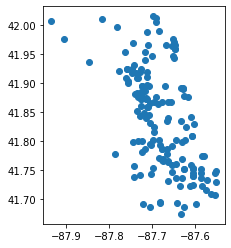

In [61]:
crashes_ped_fatal_df.plot();

In [99]:
crash_id_peds_incapacitating = peds_incapacitating_df['crash_record_id'].tolist()
crashes_ped_incapacitating_df = crashes_df.loc[crashes_df['crash_record_id'].isin(crash_id_peds_incapacitating)].reset_index(drop=True)
crashes_ped_incapacitating_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   geometry                       2290 non-null   geometry
 1   injuries_fatal                 2290 non-null   float64 
 2   injuries_non_incapacitating    2290 non-null   float64 
 3   crash_record_id                2290 non-null   object  
 4   injuries_incapacitating        2290 non-null   float64 
 5   injuries_no_indication         2290 non-null   float64 
 6   latitude                       2290 non-null   object  
 7   injuries_unknown               2290 non-null   float64 
 8   device_condition               2290 non-null   object  
 9   crash_date                     2290 non-null   object  
 10  trafficway_type                2290 non-null   object  
 11  traffic_control_device         2290 non-null   object  
 12  road_defect               

## map things to do: clean up crash_date string
## merge columns like pedpedal_location and pedpedal_action from people to be able to display on map popup

In [100]:
area_center = [41.881288,-87.686729]
ped_fatal_cluster_map = folium.Map(location =  area_center, zoom_start = 11)
marker_cluster = MarkerCluster().add_to(ped_fatal_cluster_map)
#folium.GeoJson(crashes_fatal_df).add_to(fatal_cluster_map)

for row_index, row_values in crashes_ped_fatal_df.iterrows():
    loc = (row_values['geometry'].y, row_values['geometry'].x)
    pop = row_values['trafficway_type'], row_values['traffic_control_device'],row_values['crash_date']
    icon=folium.Icon(color="blue",icon='user', prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop,
    icon = icon)
    
    marker.add_to(marker_cluster)


ped_fatal_cluster_map

In [101]:
area_center = [41.881288,-87.686729]
ped_incapacitating_cluster_map = folium.Map(location =  area_center, zoom_start = 11)
marker_cluster = MarkerCluster().add_to(ped_incapacitating_cluster_map)
#folium.GeoJson(crashes_fatal_df).add_to(fatal_cluster_map)

for row_index, row_values in crashes_ped_incapacitating_df.iterrows():
    loc = (row_values['geometry'].y, row_values['geometry'].x)
    pop = row_values['trafficway_type'], row_values['traffic_control_device'],row_values['crash_date']
    icon=folium.Icon(color="blue",icon='user', prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop,
    icon = icon)
    
    marker.add_to(marker_cluster)


ped_incapacitating_cluster_map

#split POINT geometries into separate lat and long columns
ped_crashes_df['lon'] = ped_crashes_df.geometry.apply(lambda p: p.x)
ped_crashes_df['lat'] = ped_crashes_df.geometry.apply(lambda p: p.y)

## get cyclists from the people API, clean

In [88]:
endpoint_people = 'https://data.cityofchicago.org/resource/u6pd-qa9d.json?person_type=BICYCLE&$limit=16000'
res = requests.get(endpoint_people)
res = res.json()
cyclists_df = pd.DataFrame(res)

In [90]:
cyclists_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9600 entries, 0 to 9599
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   person_id              9600 non-null   object
 1   person_type            9600 non-null   object
 2   crash_record_id        9600 non-null   object
 3   crash_date             9600 non-null   object
 4   sex                    9462 non-null   object
 5   safety_equipment       9461 non-null   object
 6   ejection               9322 non-null   object
 7   injury_classification  9598 non-null   object
 8   pedpedal_action        9598 non-null   object
 9   pedpedal_visibility    9598 non-null   object
 10  pedpedal_location      9598 non-null   object
 11  bac_result             9288 non-null   object
 12  city                   8300 non-null   object
 13  state                  8204 non-null   object
 14  driver_action          9404 non-null   object
 15  driver_vision        

In [91]:
#remove cyclists who were impaired by drugs or alcohol or both
physical_condition_list = ['NORMAL','UNKNOWN','REMOVED BY EMS','OTHER','EMOTIONAL']
cyclists_df = cyclists_df.loc[cyclists_df['physical_condition'].isin(physical_condition_list)]

In [93]:
cyclists_df['injury_classification'].value_counts()

NONINCAPACITATING INJURY    4499
NO INDICATION OF INJURY     2844
REPORTED, NOT EVIDENT       1045
INCAPACITATING INJURY        854
FATAL                         29
Name: injury_classification, dtype: int64

## generate 4 dfs for cyclists by injury classification

In [94]:
cyclists_fatal_df = cyclists_df.loc[cyclists_df['injury_classification'] == 'FATAL']
cyclists_fatal_df.shape

(29, 24)

In [95]:
cyclists_incapacitating_df = cyclists_df.loc[cyclists_df['injury_classification'] == 'INCAPACITATING INJURY']
cyclists_incapacitating_df.shape

(854, 24)

In [96]:
cyclists_nonincapacitating_df = cyclists_df.loc[cyclists_df['injury_classification'] == 'NONINCAPACITATING INJURY']
cyclists_nonincapacitating_df.shape

(4499, 24)

In [97]:
cyclists_no_signif_injury_df = cyclists_df.loc[cyclists_df['injury_classification'].isin(['REPORTED, NOT EVIDENT','NO INDICATION OF INJURY'])]
cyclists_no_signif_injury_df.shape

(3889, 24)

## extract crash_record_ids from cyclists_dfs and filter crashes_df to create 4 dfs for crashes by injury classification

In [105]:
crash_id_cyclists_fatal = cyclists_fatal_df['crash_record_id'].tolist()
crashes_cyclist_fatal_df = crashes_df.loc[crashes_df['crash_record_id'].isin(crash_id_cyclists_fatal)].reset_index(drop=True)
crashes_cyclist_fatal_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   geometry                       29 non-null     geometry
 1   injuries_fatal                 29 non-null     float64 
 2   injuries_non_incapacitating    29 non-null     float64 
 3   crash_record_id                29 non-null     object  
 4   injuries_incapacitating        29 non-null     float64 
 5   injuries_no_indication         29 non-null     float64 
 6   latitude                       29 non-null     object  
 7   injuries_unknown               29 non-null     float64 
 8   device_condition               29 non-null     object  
 9   crash_date                     29 non-null     object  
 10  trafficway_type                29 non-null     object  
 11  traffic_control_device         29 non-null     object  
 12  road_defect                   

In [104]:
#why does this go down from 854 to 834?
crash_id_cyclists_incapacitating = cyclists_incapacitating_df['crash_record_id'].tolist()
crashes_cyclist_incapacitating_df = crashes_df.loc[crashes_df['crash_record_id'].isin(crash_id_cyclists_incapacitating)].reset_index(drop=True)
crashes_cyclist_incapacitating_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 834 entries, 0 to 833
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   geometry                       834 non-null    geometry
 1   injuries_fatal                 834 non-null    float64 
 2   injuries_non_incapacitating    834 non-null    float64 
 3   crash_record_id                834 non-null    object  
 4   injuries_incapacitating        834 non-null    float64 
 5   injuries_no_indication         834 non-null    float64 
 6   latitude                       834 non-null    object  
 7   injuries_unknown               834 non-null    float64 
 8   device_condition               834 non-null    object  
 9   crash_date                     834 non-null    object  
 10  trafficway_type                834 non-null    object  
 11  traffic_control_device         834 non-null    object  
 12  road_defect                 

In [106]:
area_center = [41.881288,-87.686729]
cyclist_fatal_cluster_map = folium.Map(location =  area_center, zoom_start = 11)
marker_cluster = MarkerCluster().add_to(cyclist_fatal_cluster_map)
#folium.GeoJson(crashes_fatal_df).add_to(fatal_cluster_map)

for row_index, row_values in crashes_cyclist_fatal_df.iterrows():
    loc = (row_values['geometry'].y, row_values['geometry'].x)
    pop = row_values['trafficway_type'], row_values['traffic_control_device'],row_values['crash_date']
    icon=folium.Icon(color="blue",icon='user', prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop,
    icon = icon)
    
    marker.add_to(marker_cluster)


cyclist_fatal_cluster_map